In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max.rows', 100)

In [3]:
# load dataframe
raw_loan = pd.read_csv('drive/MyDrive/Dataset/loan_data_2007_2014.csv', index_col=['Unnamed: 0'], low_memory=False)

# Eksplorasi Data

In [4]:
# melihat kolom
raw_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
raw_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [6]:
raw_loan.dropna(axis=1, how='all', inplace=True)

In [7]:
raw_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [8]:
raw_loan.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124436,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


## Menetukan Target

Pada umunnya, target merupakan variabel yang dikehendaki untuk menyelesaikan masalah.
Pada kasus saat ini, hendak memprediksi risiko kredit. Risiko kredit adalah suatu risiko akibat kegagalan debitur untuk memenuhi kewajiban membayar kredit pada saat jatuh tempo. Berdasarkan pengertian tersebut, varibel yang dijadikan target adalah loan_status. loan_status merupakan varibel/fitur yang mengidentifikasi bagaimana debitur dalam memenuhi kewajibannya.


In [9]:
raw_loan.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Dapat dilihat nilai loan_status berupa:
- _Current_ : lancar
- _Fully Paid_ : lunas
- _Charged Off_ : denda
- _In Grace Period_ : dalam waktu tenggang
- _Default_ : tidak lancar

Untuk mempermudah dalam pemodelan akan dibuat dua kriteria, yaitu `risk` bernilai 1 untuk loan_status yang jelek dan 0 untuk yang baik.

In [10]:
is_good = ['Current', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)']
raw_loan['risk'] = 1
raw_loan.loc[raw_loan.loan_status.isin(is_good), 'risk'] = 0

In [11]:
raw_loan.groupby('loan_status')['risk'].mean()

loan_status
Charged Off                                            1.0
Current                                                0.0
Default                                                1.0
Does not meet the credit policy. Status:Charged Off    1.0
Does not meet the credit policy. Status:Fully Paid     1.0
Fully Paid                                             0.0
In Grace Period                                        0.0
Late (16-30 days)                                      0.0
Late (31-120 days)                                     1.0
Name: risk, dtype: float64

## Indentifikasi Data Duplikat

In [12]:
id_nuniq=raw_loan['id'].nunique()
print(f'Terdapat {id_nuniq} data dari {len(raw_loan.id)} data di kolom id')

Terdapat 466285 data dari 466285 data di kolom id


In [13]:
mem_nuniq=raw_loan['member_id'].nunique()
print(f'Terdapat {mem_nuniq} data dari {len(raw_loan.member_id)} data di kolom id')

Terdapat 466285 data dari 466285 data di kolom id


Terlihat tidak ada data duplikat di dalam dataframe.

# Data Preprocessing


## Menghilangkan Kolom yang Tidak Relevan
Kolom yang dihilangkan berupa data yang unik dan bernilai sama semua.
Berikut ini daftar kolom-kolom dengan data yang unik
- `id`
- `member_id`
- `emp_title`
- `url`
- `desc`
- `title`
- `zip_code`
- `addr_state`

Berikut ini daftar kolom-kolom dengan data bernilai sama
- `pymnt_plan`
- `policy_code`
- `application_type`

Terdapat pula kolom `sub_grade` yang merupakan percabangan atau klasifikasi lebih sepefik dari `grade`. Kolom `sub_grade` juga dapat dihilangkan kerena sudah terwakili oleh `grade`.

In [14]:
raw_loan = raw_loan.drop(['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state',
                           'pymnt_plan', 'policy_code', 'application_type',
                           'sub_grade'], axis=1)
raw_loan.shape

(466285, 46)

## Menangani Missing Data dan Outlier

In [15]:
raw_loan.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
purpose                             0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
initial_list_status                 0
out_prncp   

Terdapat 7 kolom yang memiliki jumlah data null yang sama. Ketujuh kolom tersebut adalah:
1. `delinq_2yrs`
2. `earliest_cr_line`
3. `inq_last_6mths`
4. `open_acc`
5. `pub_rec`
6. `total_acc`
7. `acc_now_delinq`

Terdapat kemungkinan ketujuh kolom tersebut terletak pada 29 data yang sama.

In [16]:
len(raw_loan.loc[(raw_loan.delinq_2yrs.isna()) &
            (raw_loan.earliest_cr_line.isna()) &
            (raw_loan.inq_last_6mths.isna()) &
            (raw_loan.open_acc.isna()) &
            (raw_loan.pub_rec.isna()) &
            (raw_loan.total_acc.isna()) &
            (raw_loan.acc_now_delinq.isna())
           ])

29

Terdapat 29 data yang memiliki nilai null di 7 kolom. Hal ini mengindikasikan terdapat hubungan antara ketujuh fitur tersebut. Kemungkinan besar 29 member tersebut belum pernah mengajukan kredit pada perusahaan tersebut (data nul pada ```earliest_cr_line```), sehingga belum pernah ada catatan _delinquency_ dan _inquiry_.

In [17]:
raw_loan.delinq_2yrs.fillna(0, inplace=True) 
# data null karena member tidak ada catatan 'delinquency'

raw_loan.inq_last_6mths.fillna(0, inplace=True)
# data null karena member tidak ada catatan 'inquiry'

raw_loan.open_acc.fillna(0, inplace=True)
# data null kemungkinan besar member tidak memiliki open credit line

raw_loan.pub_rec.fillna(0, inplace=True)
# data null kemungkinan besar member tidak memiliki public record

raw_loan.total_acc.fillna(0, inplace=True)
# data null kemungkinan besar member tidak memiliki credit line

raw_loan.acc_now_delinq.fillna(0, inplace=True)
# data null karena member tidak ada catatan 'delinquency'

Data dalam kolom `earliest_cr_line` berupa str dalam format date `%b-%y`. Format `%b` berati nama singkatan bulan (misalnya: Jan) dan format `%y` adalah dua digit terakhir dari tahun (misalnya: 19). Dibuat rekayasa fitur `mnths_after_earliest_cr` yang menandakan berapa bulan setelah kredit pertama. Untuk tanggal reverensinya dapat dilihat dari `last_pymnt_d` dan `next_pymnt_d` pada loan_status = _Current_.

In [18]:
raw_loan[['last_pymnt_d', 'next_pymnt_d']].loc[raw_loan.loan_status == 'Current'].value_counts()

last_pymnt_d  next_pymnt_d
Jan-16        Feb-16          158973
Dec-15        Feb-16           38532
Jan-16        Jan-16           15672
Dec-15        Jan-16           11032
Jan-16        Mar-16               9
Dec-15        Mar-16               8
dtype: int64

Berdasarkan data tersebut, terlihat terdapat sejumlah data `last_paymnt_d` pada Januari 2016 dan `next_pymnt_d` pada Februari 2016. Namun, ada pula sejumlah data dengan `next_pymnt_d` pada Januari 2016. Jadi kemungkinan besar tanggal referensi pada dataframe tersebut sekitar pertengahan bulan Januari. Di sini akan digunakan tanggal refenrensinya yaitu 16 Januari 2016.

In [19]:
# Memodifikasi kolom earliest_cr_line
raw_loan['earliest_cr_line_date'] = pd.to_datetime(raw_loan['earliest_cr_line'], format='%b-%y')

In [20]:
raw_loan['earliest_cr_line_date'].sample(5)

112735   1990-05-01
244400   2002-08-01
144343   2000-10-01
317425   1999-11-01
342689   2002-04-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [21]:
raw_loan['mnths_after_earliest_cr'] = np.floor(pd.to_numeric((pd.to_datetime('2016-01-16') - raw_loan['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [22]:
raw_loan['mnths_after_earliest_cr'].describe()

count    466256.000000
mean        216.482430
std          93.974829
min        -635.000000
25%         160.000000
50%         202.000000
75%         262.000000
max         564.000000
Name: mnths_after_earliest_cr, dtype: float64

Terdapat anomali dalam data rekayasa fitur `mnths_after_earliest_cr`, yaitu nilai negatif pada nilai minimumnya.

In [23]:
raw_loan['earliest_cr_line_date'].loc[raw_loan.earliest_cr_line_date >= '2016-01-16']

1580     2062-09-01
1770     2068-09-01
2799     2064-09-01
3282     2067-09-01
3359     2065-02-01
            ...    
464003   2068-01-01
464260   2066-07-01
465100   2067-10-01
465500   2067-09-01
465655   2056-01-01
Name: earliest_cr_line_date, Length: 1169, dtype: datetime64[ns]

Ternyata terjadi kesalahan dalam mengkonversi str menjadi date. Tahun-tahun yang harusnya pada abad ke-20 menjadi abad ke-21.

In [24]:
raw_loan['earliest_cr_line_date'] = np.where(raw_loan['earliest_cr_line_date'].dt.year > 2016, 
                                             raw_loan['earliest_cr_line_date'] - pd.offsets.DateOffset(years=100), raw_loan['earliest_cr_line_date'])

In [25]:
raw_loan['mnths_after_earliest_cr'] = np.floor(pd.to_numeric((pd.to_datetime('2016-01-16') - raw_loan['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [26]:
raw_loan['mnths_after_earliest_cr'].describe()

count    466256.000000
mean        219.491078
std          86.928944
min          50.000000
25%         161.000000
50%         203.000000
75%         262.000000
max         864.000000
Name: mnths_after_earliest_cr, dtype: float64

In [27]:
raw_loan.mnths_after_earliest_cr.fillna(0, inplace=True)
raw_loan.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

Pada `issue_d`, `last_pymnt_d`, `next_pymnt_d` dan `last_credit_pull_d` dilakukan sama seperti `earliest_cr_line_date`.

In [28]:
raw_loan['issue_date'] = pd.to_datetime(raw_loan['issue_d'], format='%b-%y')
raw_loan['mnths_after_issue_d'] = np.floor(pd.to_numeric((pd.to_datetime('2016-01-16') - raw_loan['issue_date']) / np.timedelta64(1, 'M')))

In [29]:
raw_loan['mnths_after_issue_d'].describe()

count    466285.000000
mean         28.255187
std          14.340154
min          13.000000
25%          18.000000
50%          24.000000
75%          34.000000
max         103.000000
Name: mnths_after_issue_d, dtype: float64

In [30]:
raw_loan['last_pymnt_date'] = pd.to_datetime(raw_loan['last_pymnt_d'], format='%b-%y')
raw_loan['mnths_after_last_pymnt_d'] = np.floor(pd.to_numeric((pd.to_datetime('2016-01-16') - raw_loan['last_pymnt_date']) / np.timedelta64(1, 'M')))

In [31]:
raw_loan['mnths_after_last_pymnt_d'].describe()

count    465909.000000
mean          8.294369
std          12.809898
min           0.000000
25%           0.000000
50%           1.000000
75%          12.000000
max          97.000000
Name: mnths_after_last_pymnt_d, dtype: float64

In [32]:
raw_loan['next_pymnt_date'] = pd.to_datetime(raw_loan['next_pymnt_d'], format='%b-%y')
raw_loan['mnths_after_next_pymnt_d'] = np.floor(pd.to_numeric((pd.to_datetime('2016-01-16') - raw_loan['next_pymnt_date']) / np.timedelta64(1, 'M')))

In [33]:
raw_loan['mnths_after_next_pymnt_d'].describe()

count    239071.000000
mean         -0.261864
std           6.082298
min          -2.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max          97.000000
Name: mnths_after_next_pymnt_d, dtype: float64

Nilai negatif pada `mnths_after_next_pymnt_d` benar karena pada kolom ini adalah tanggal setelah tanggal referensi. Adapun nilai positif, menunjukkan debitur belum membayar kewajibannya.

In [34]:
raw_loan['last_credit_pull_date'] = pd.to_datetime(raw_loan['last_credit_pull_d'], format='%b-%y')
raw_loan['mnths_after_last_credit_pull_d'] = np.floor(pd.to_numeric((pd.to_datetime('2016-01-16') - raw_loan['last_credit_pull_date']) / np.timedelta64(1, 'M')))

In [35]:
raw_loan['mnths_after_last_credit_pull_d'].describe()

count    466243.000000
mean          4.045588
std           9.636423
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         104.000000
Name: mnths_after_last_credit_pull_d, dtype: float64

In [36]:
raw_loan.drop(['issue_d', 'issue_date',
               'last_pymnt_d', 'last_pymnt_date',
               'next_pymnt_d', 'next_pymnt_date',
               'last_credit_pull_d', 'last_credit_pull_date'], axis=1, inplace=True)

In [37]:
emp_length_mode = pd.Series.mode(raw_loan['emp_length'])
raw_loan['emp_length'].fillna(emp_length_mode[0], inplace=True)

In [38]:
raw_loan['annual_inc'] = raw_loan.groupby('loan_amnt')['annual_inc'].apply(lambda x: x.fillna(x.median()))

Kolom/fitur ```mths_since_last_delinq``` menunjukkan sudah berapa bulan member terakhir melakukan _delinquency_. 
Nilai null dari fitur ini kemungkinan besar disebabkan member memang belum pernah melakukan _delinquency_.
Mengisi data null pada fitur ini tidak memunkinkan diisi dengan string **'Tidak pernah'** atau **_'Never'_**. Mengingat fitur ini merupakan fitur numerikal. Oleh karena itu dari data fitur ini akan dibuat fitur rekayasa, yaitu ```ever_deliq``` yang merupakan indikasi member pernah melakukan _delinquency_ dengan nilai 1 berarti pernah dan 0 berarti tidak pernah.

In [39]:
raw_loan['ever_deliq'] = 0
raw_loan.loc[raw_loan.mths_since_last_delinq > 0, 'ever_deliq'] = 1

In [40]:
raw_loan.drop(['mths_since_last_delinq'], axis=1, inplace = True)

In [41]:
raw_loan.revol_util.value_counts()
raw_loan.revol_util.fillna(0, inplace=True)

In [42]:
raw_loan.drop(['mths_since_last_record', 'mths_since_last_major_derog'], axis=1, inplace = True)
# missing value lebih banyak daripada yang tidak

In [43]:
raw_loan.isna().sum()

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
emp_length                             0
home_ownership                         0
annual_inc                             0
verification_status                    0
loan_status                            0
purpose                                0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
out_prncp                              0
out_prncp_inv                          0
total_pymnt     

In [44]:
# mnths_after_next_pymnt_d
raw_loan.risk.loc[raw_loan.mnths_after_next_pymnt_d.isna()].mean()

0.1869383048579753

Hasil tersebut menunjukan bahwa missing value pada kolom `mnths_after_next_pymnt_d` sering muncul pada risk = 0 dan beberapa dengan risk = 1.

In [45]:
raw_loan.loan_status.loc[(raw_loan.mnths_after_next_pymnt_d.isna()) & (raw_loan.risk == 0)].value_counts()

Fully Paid    184739
Name: loan_status, dtype: int64

In [46]:
raw_loan.mnths_after_next_pymnt_d.loc[(raw_loan.loan_status == 'Fully Paid')].value_counts()

Series([], Name: mnths_after_next_pymnt_d, dtype: int64)

In [47]:
raw_loan.loan_status.loc[(raw_loan.mnths_after_next_pymnt_d.isna()) & (raw_loan.risk == 1)].value_counts()

Charged Off    42475
Name: loan_status, dtype: int64

In [48]:
raw_loan.mnths_after_next_pymnt_d.loc[(raw_loan.loan_status == 'Charged Off')].value_counts()

Series([], Name: mnths_after_next_pymnt_d, dtype: int64)

Dari hasil tersebut, data null pada kolom `mnths_after_next_pymnt_d` disebabkan memang tidak ada nilai valid yang dapat mengisi kolom tersebut. Debitur dengan status sudah lunas (_Fully Paid_) tidak memiliki kewajiban membayar lagi. Sedangkan debitur dengan status denda harus membayar denda & kewajibannya sebelumnya sehingga tidak memiliki tanggal kapan debitur harus melaksanakan kewajibannya kembali. Missing value akan diisi dengan nilai yang sekiranya unik untuk membedakan apakah itu memang data valid `mnths_after_next_pymnt_d` atau untuk menindentifikasi kalau pada tersebut berstatus _Fully Paid_ dan _Charged Off_. Untuk _Fully Paid_ akan diisi -10 dan untuk _Charged Off_ akan disi -5

In [49]:
raw_loan.loc[((raw_loan.mnths_after_next_pymnt_d.isna()) & (raw_loan.loan_status == 'Fully Paid')), 'mnths_after_next_pymnt_d'] = -10
raw_loan.loc[((raw_loan.mnths_after_next_pymnt_d.isna()) & (raw_loan.loan_status == 'Charged Off')), 'mnths_after_next_pymnt_d'] = -5

Nilai null pada `mnths_after_last_pymnt_d` kemungkinan debitur belum pernah membayar sama sekali.

In [50]:
raw_loan.loan_status.loc[raw_loan.mnths_after_last_pymnt_d.isna()].value_counts()

Charged Off                                            364
Does not meet the credit policy. Status:Charged Off     12
Name: loan_status, dtype: int64

Dari hasil di atas terlihat bahwa benar nilai null pada kolom tersebut, debitur belum pernah membayar sama sekali. Ditandai dengan semua dalam status denda. Hal ini berarti nilai null pada kolom ini memang tidak ada data valid untuk mengisi kolom tersebut. _Missing value_ akan diisi dengan data yang unik sehingga dapat membedakan apakah itu memang data valid `mnths_after_last_pymnt_d` atau untuk menindentifikasi kalau pada tersebut berstatus _Charged Off_ (-1)

In [51]:
raw_loan.loc[(raw_loan.mnths_after_last_pymnt_d.isna()), 'mnths_after_last_pymnt_d'] = -1

Hal yang sama juga pada `mnths_after_last_credit_pull_d`. Nilai null karena tidak ada nilai valid yang dapat mengisi data tersebut karena debitur kemungkinan tidak menarik kredit lagi.

In [52]:
# mnths_after_last_credit_pull_d
raw_loan.loc[(raw_loan.mnths_after_last_credit_pull_d.isna()), 'mnths_after_last_credit_pull_d'] = -1

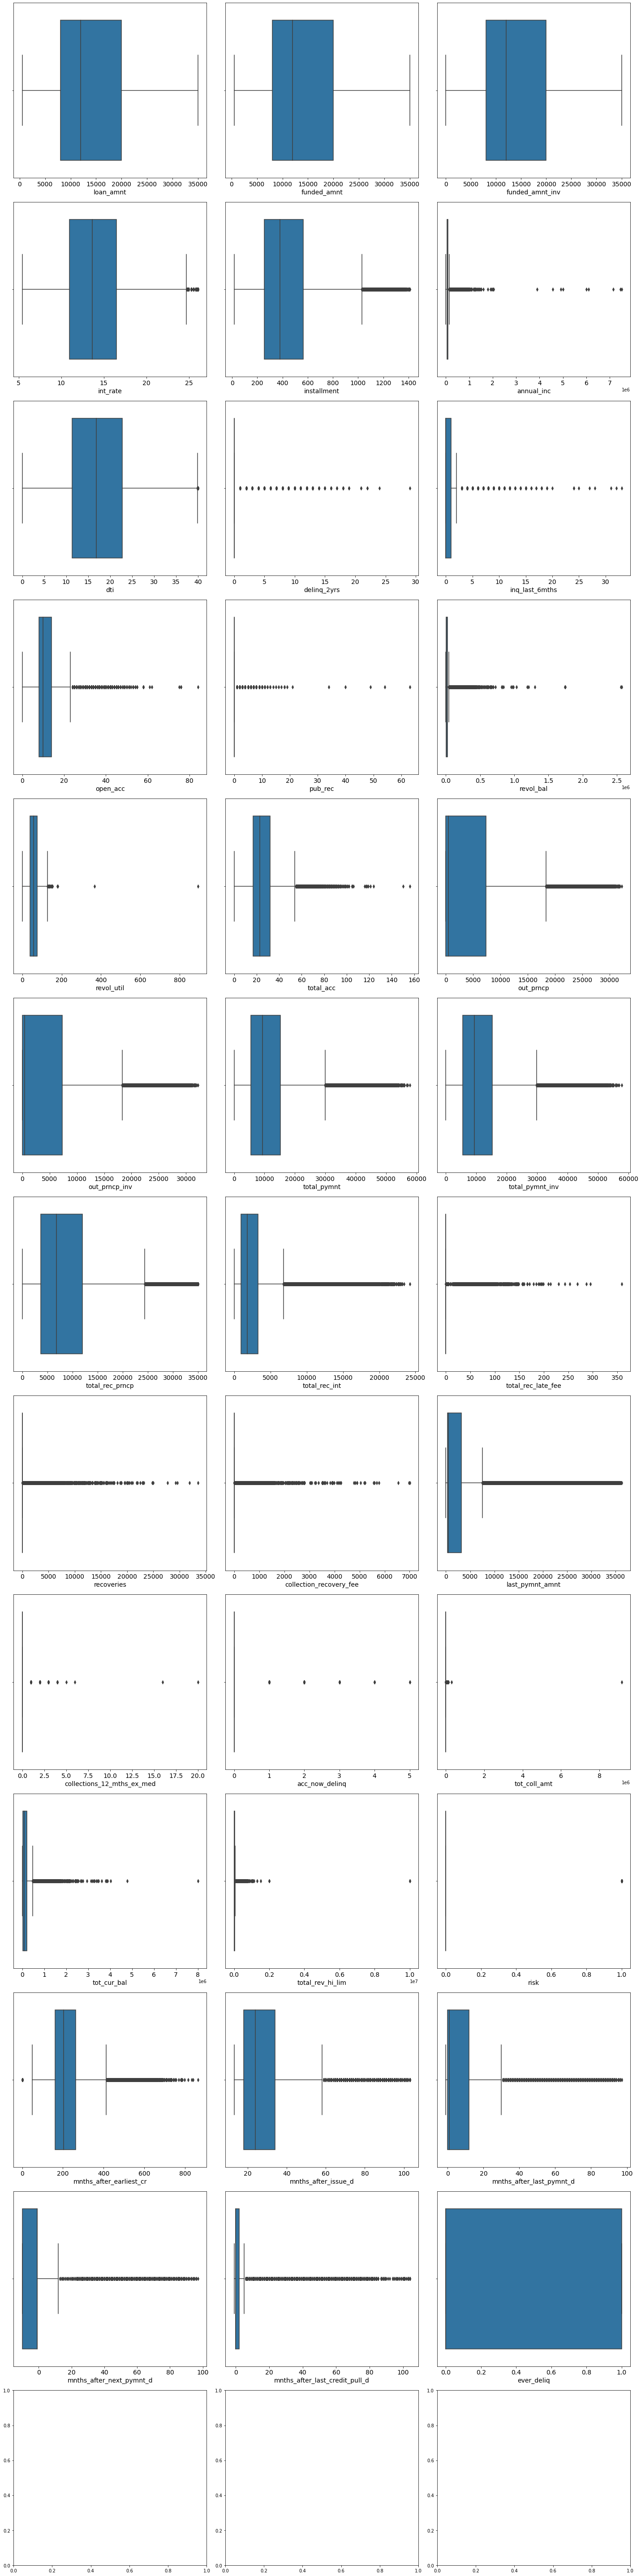

In [53]:
num = [n for n in raw_loan.columns if raw_loan[n].dtype != 'object']
fig, axs = plt.subplots(ncols=3, nrows=13, figsize=(20, 80))

for i, num in enumerate(num, 1):
    plt.subplot(13, 3, i)
    sns.boxplot(x=num, data=raw_loan)
    plt.xlabel('{}'.format(num), size=14)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
 
plt.tight_layout()
plt.show()

Dari grafik di atas, beberapa kolom memiliki outlier yang ekstrim. Pada umumnya penanganan outlier dilakukan dengan menghapus data-data yang termasuk outlier. Namun, pada data terdapat kolom berisi data yang sangat dominan, misalnya ```pub_rec```. Pada kolom tersebut sebagian besar bernilai 0 dan yang bukan 0 merupakan nilai outlier. Karena memang hanya sedikit orang yang miliki catatan publik yang jelek. Data seperti ini biasanya tidak akan memberikan pengaruh yang signifikan pada pemodelan. Oleh karena itu, kolom yang berisi data-data mirip dengan ```pub_rec``` akan dihapus.

Berikut ini beberapa kolom/fitur yang terdiri dari data yang mendominasi
- pub_rec
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- collections_12_mths_ex_med
- acc_now_delinq
- tot_coll_amt

In [54]:
raw_loan.tot_coll_amt.value_counts()

0.0        346259
50.0          837
100.0         650
75.0          515
60.0          309
            ...  
13779.0         1
15036.0         1
15986.0         1
2477.0          1
6532.0          1
Name: tot_coll_amt, Length: 6321, dtype: int64

In [55]:
raw_loan = raw_loan.drop(['delinq_2yrs', 'pub_rec', 'total_rec_late_fee', 
                        'recoveries', 'collection_recovery_fee', 'acc_now_delinq',
                        'collections_12_mths_ex_med', 'tot_coll_amt'
                        ],
                  axis=1)

Untuk data outlier yang akan dihapus adalah dari kolom/fitur berikut:

- annual_inc
- revol_bal
- revol_util
- tot_cur_bal
- total_rev_hi_lim

In [57]:
# mengisi missing value pada kolom/fitur tot_coll_amt, tot_cur_bal, total_rev_hi_lim dengan mediannya
raw_loan['tot_cur_bal'].fillna(raw_loan.tot_cur_bal.median(), inplace=True)
raw_loan['total_rev_hi_lim'].fillna(raw_loan.total_rev_hi_lim.median(), inplace=True)

In [58]:
def bool_outlier(col):
  q1 = np.quantile(raw_loan[col], 0.25)
  q3 = np.quantile(raw_loan[col], 0.75)
  IQR = q3 - q1
  return ((raw_loan[col]<=q3 + 1.5*IQR) & (raw_loan[col] >= q1 - 1.5*IQR))

In [59]:
raw_loan = raw_loan.loc[(bool_outlier('annual_inc')) & 
                      (bool_outlier('revol_bal')) & 
                      (bool_outlier('revol_util')) & 
                      (bool_outlier('tot_cur_bal')) &
                      (bool_outlier('total_rev_hi_lim'))
                      ]

In [60]:
raw_loan.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
purpose                           0
dti                               0
inq_last_6mths                    0
open_acc                          0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
last_pymnt_amnt                   0
tot_cur_bal                 

## Encoding fitur kategori
Fitur kategori yang belum diencode menjadi numerik
- term (kategorikal)
- grade (ordinal)
- emp_length (ordinal)
- home_ownership (ordinal)
- verification_status (ordinal)
- loan_status (ordinal)
- purpose (kategorikal)
- initial_list_status (ordinal)

In [61]:
df_loan_enc = raw_loan.copy()

df_loan_enc.loc[df_loan_enc.home_ownership == 'ANY', 'home_ownership'] = 'OTHER'

df_loan_enc.drop('loan_status', axis=1, inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

purpose_label = LabelEncoder()
df_loan_enc['purpose'] = purpose_label.fit_transform(df_loan_enc.purpose)

ord_fea = ['grade', 'emp_length', 'home_ownership', 'verification_status']

ord_grade = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
ord_emp = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
           '6 years', '7 years', '8 years', '9 years', '10+ years']
ord_home = ['NONE', 'RENT', 'OTHER', 'MORTGAGE', 'OWN']
ord_ver = ['Not Verified', 'Source Verified', 'Verified']

ordinal_encoder = OrdinalEncoder(
    categories=[ord_grade, ord_emp, ord_home, ord_ver]
)

df_loan_enc[ord_fea] = ordinal_encoder.fit_transform(df_loan_enc[ord_fea])

le_term = LabelEncoder()
df_loan_enc['term'] = le_term.fit_transform(df_loan_enc.term)
le_init = LabelEncoder()
df_loan_enc['initial_list_status'] = le_init.fit_transform(df_loan_enc.initial_list_status)
# df_loan_enc = pd.get_dummies(df_loan_enc)

In [63]:
df_loan_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402517 entries, 0 to 466284
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       402517 non-null  int64  
 1   funded_amnt                     402517 non-null  int64  
 2   funded_amnt_inv                 402517 non-null  float64
 3   term                            402517 non-null  int64  
 4   int_rate                        402517 non-null  float64
 5   installment                     402517 non-null  float64
 6   grade                           402517 non-null  float64
 7   emp_length                      402517 non-null  float64
 8   home_ownership                  402517 non-null  float64
 9   annual_inc                      402517 non-null  float64
 10  verification_status             402517 non-null  float64
 11  purpose                         402517 non-null  int64  
 12  dti             

# Pemodelan

In [64]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

In [65]:
# memisahkan fitur dengan target
y = df_loan_enc['risk']
X = df_loan_enc.drop(['risk'], axis=1)
X.shape

(402517, 34)

In [66]:
# memisahkan data train dan test
# import random
# rand_num = random.randint(0, 2**32)
# rand_num
rand_num = 589126908
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rand_num)

In [67]:
# Base model
rf_clf = RandomForestClassifier(min_samples_split=20, n_jobs=-1, random_state=1)
gb_clf = GradientBoostingClassifier(min_samples_split=20, max_leaf_nodes=32, random_state=1)

In [68]:
def evaluate_model (predict):
    score = accuracy_score(predict, y_test)
    return score

In [69]:
def cv_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [70]:
models = dict()
models['Random_Forest'] = rf_clf
models['Gradien_Boosting'] = gb_clf
models

{'Gradien_Boosting': GradientBoostingClassifier(max_leaf_nodes=32, min_samples_split=20,
                            random_state=1),
 'Random_Forest': RandomForestClassifier(min_samples_split=20, n_jobs=-1, random_state=1)}

In [73]:
results, names = list(), list()
for name, model in models.items():
    scores = cv_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

Random_Forest 0.997 (0.000)
Gradien_Boosting 0.997 (0.000)


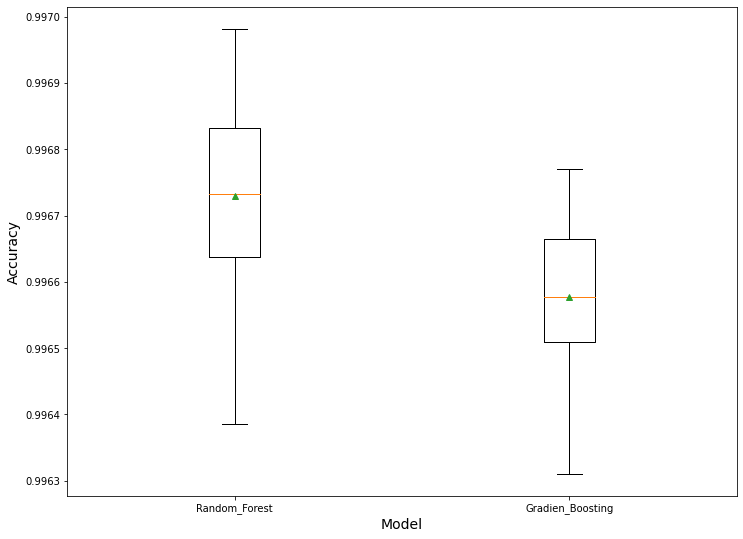

In [74]:
# plot model performance for comparison
plt.figure(figsize=(12,9))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy', size=14)
plt.xlabel('Model', size=14)
plt.show()

## Random Forest

In [71]:
# # Uncomment di bawah ini untuk fitting data
# rf_clf.fit(X_train, y_train)
# y_pred_rf = rf_clf.predict(X_test)
# print('score %.4f' % evaluate_model(y_pred_rf))

score 0.9967


In [81]:
# # Uncomment di bawah ini untuk save model
# # Save model
# joblib.dump(rf_clf, 'random_forest.sav')

['random_forest.sav']

In [82]:
# load_model
random_forest = joblib.load('random_forest.sav')
result = random_forest.score(X_test, y_test)
print('score %.4f' % result)

score 0.9967


## Gradient Boosting

In [72]:
# # Uncomment di bawah ini untuk fitting data
# gb_clf.fit(X_train, y_train)
# y_pred_gb = gb_clf.predict(X_test)
# print('score %.4f' %  evaluate_model(y_pred_gb))

score 0.9967


In [83]:
# # Uncomment di bawah ini untuk save model
# # Save model
# joblib.dump(gb_clf, 'gradient_boosting.sav')

['gradient_boosting.sav']

In [84]:
# load_model
gradient_boosting = joblib.load('gradient_boosting.sav')
result = gradient_boosting.score(X_test, y_test)
print('score %.4f' % result)

score 0.9967


Dari kedua model tersebut, Random Forest dan Gradient Boosting terlihat memiliki akurasi yang sangat baik dalam mengklasifikasi risiko kredit.

In [80]:
rf_importances = rf_clf.feature_importances_
gb_importances = gb_clf.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_names)), columns=['feature', 'rf_importance', 'gb_importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['rf_importance'] = rf_importances
df_feature_importance['gb_importance'] = gb_importances
df_all_features = df_feature_importance.sort_values(by='rf_importance', ascending=False)
df_all_features

,feature,rf_importance,gb_importance
31,mnths_after_next_pymnt_d,0.303352,6.688245e-01
30,mnths_after_last_pymnt_d,0.187182,1.913517e-01
23,total_rec_prncp,0.109811,1.345266e-01
20,out_prncp_inv,0.068934,1.183399e-03
19,out_prncp,0.060235,8.413188e-04
25,last_pymnt_amnt,0.051569,2.988626e-03
22,total_pymnt_inv,0.036797,4.337150e-06
2,funded_amnt_inv,0.027069,0.000000e+00
21,total_pymnt,0.024172,9.211025e-07
0,loan_amnt,0.024024,5.723390e-07


Setelah dilihat _features importances_ dalam kedua pemodelan tersebut, ternyata fitur `mnths_after_next_pymnt_d` menjadi fitur paling penting di dalam klasifikasi risiko model. Kemudian diikuti `mnths_after_last_pymnt_d` dan `total_rec_prncp` 